In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings   
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv('loan.csv')

In [5]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### AIM: The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
df.shape

(39717, 111)

#### Observations:
1. There are 39717 rows & 111 columns 
2. Many columns have null values which has to be removed

### Handling Missing Values

In [9]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
#Dropping the columns having missing values
df.dropna(axis=1, how='all', inplace=True )

In [11]:
round((df.isnull().sum() / df.shape[0]),2) * 100.00

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

#### Observations:
1. 'mths_since_last_record' & 'next_pymnt_d' columns has more than 90% null values
2. these 2 columns can be removed 

In [12]:
df.shape

(39717, 57)

In [13]:
#Dropping the columns having missing values
df.drop(['mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True )

In [14]:
round((df.isnull().sum() / df.shape[0]),2) * 100.00

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

#### Observations:
1. Now we have 2 columns 'mths_since_last_delinq' with 65% null values & 'desc' with 33% null values.


In [15]:
df.desc.head(5)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In desc column applicant had provided self written notes which, as of now, no use for the analysis. Hence it is better to drop desc column.

In [16]:
df.drop(['desc'], axis=1, inplace=True )

In [17]:
df.mths_since_last_delinq.head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

So these column is of a concern months after taking a loan. According to our target issue, dealing with this column is not necessary. Hence we will drop this column

In [18]:
df.drop(['mths_since_last_delinq'], axis=1, inplace=True )

In [19]:
round((df.isnull().sum() / df.shape[0]),2) * 100.00

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Observation:
1. we have int_rate column which is object dtype which has to be changed to float dtype 
2. we have term & emp_length which are in object dtype which has to be converted to int dtype

In [21]:
#conversion of int_rate dtype
df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [22]:
df['int_rate']= df['int_rate'].str.replace('%','').astype(float)

In [23]:
#conversion term dtype
df.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [24]:
df['term']= df['term'].str.split('months').str[0].astype(np.int64)

In [25]:
#conversion emp_length dtype
df.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [26]:
df = df[~df['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [27]:
df['emp_length']= df['emp_length'].astype(np.int64)

In [28]:
df.emp_length.head(5)

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

The columns which gives the noted parameters after the loan is approved. So, these variables were not considered while approving the loan. These columns are of no use for our objective. It is required to drop these columns for further analysis.

In [30]:
remove_columns= ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                'total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [31]:
df.drop(remove_columns, axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [33]:
## columns such as policy_code,title, url, zip_code, state, address are not useful for analysis. Drop these columns
df.drop(['policy_code', 'title', 'url', 'zip_code', 'addr_state'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [35]:
df['issue_d'].head(5)

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [36]:
#to create a new column for year in issue_d & convert it to int dtype
df['year']= df['issue_d'].str.split('-').str[1].astype(np.int64)

In [37]:
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     1440
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
dti                              0
initial_list_status              0
collections_12_mths_ex_med      56
acc_now_delinq                   0
chargeoff_within_12_mths        56
delinq_amnt                      0
pub_rec_bankruptcies           697
tax_liens                       39
year                             0
dtype: int64

In [38]:
df['emp_title'].head(10)

0                          NaN
1                        Ryder
2                          NaN
3          AIR RESOURCES BOARD
4     University Medical Group
5         Veolia Transportaton
6    Southern Star Photography
7              MKC Accounting 
8                          NaN
9                    Starbucks
Name: emp_title, dtype: object

every row in 'emp_title' is different. It will be dropped for further analysis

In [39]:
#removing employment title(emp_title) column
df.drop('emp_title', axis=1, inplace=True)

In [40]:
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
dti                             0
initial_list_status             0
collections_12_mths_ex_med     56
acc_now_delinq                  0
chargeoff_within_12_mths       56
delinq_amnt                     0
pub_rec_bankruptcies          697
tax_liens                      39
year                            0
dtype: int64

In [41]:
df.shape

(38642, 27)

In [42]:
df[['pub_rec_bankruptcies', 'loan_status']].sample(10)

,pub_rec_bankruptcies,loan_status
18956,0.0,Charged Off
36097,0.0,Fully Paid
14608,0.0,Charged Off
22614,0.0,Fully Paid
26819,0.0,Charged Off
10093,0.0,Fully Paid
36493,0.0,Fully Paid
19450,0.0,Fully Paid
38437,0.0,Fully Paid
29135,0.0,Fully Paid


In [43]:
#calculating percent missing values in pub_rec_bankruptcies
float(100.0*697/df.shape[0])

1.8037368666218105

In [44]:
#normalize: to check the frequency of the data in % in the whole data
df.pub_rec_bankruptcies.value_counts(normalize=True)

0.0    0.958624
1.0    0.041191
2.0    0.000184
Name: pub_rec_bankruptcies, dtype: float64

In [45]:
df['pub_rec_bankruptcies'].isnull().sum()

697

In [46]:
#dropping the missing values in 'pub_rec_bankruptcies' column
df.dropna(subset=['pub_rec_bankruptcies'], inplace= True)

In [47]:
df['pub_rec_bankruptcies'].isnull().sum()

0

In [48]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
initial_list_status           0
collections_12_mths_ex_med    2
acc_now_delinq                0
chargeoff_within_12_mths      2
delinq_amnt                   0
pub_rec_bankruptcies          0
tax_liens                     0
year                          0
dtype: int64

### Data Analysis

In [49]:
df.loan_status.value_counts()

Fully Paid     31566
Charged Off     5281
Current         1098
Name: loan_status, dtype: int64

In [50]:
df.loan_status.head(5)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [51]:
#loan status 'current' is not required for analysis
#handling Categorical feature 'loan_staus' which is either 'Fully Paid' or 'Charged off'
df['loan_status']= df['loan_status'].map({'Fully Paid':0,'Charged Off':1}) 
#map function replaces 'Fully Paid' with 0 & 'Charged off' with 1

In [52]:
df.loan_status.value_counts(normalize=True)

0.0    0.856678
1.0    0.143322
Name: loan_status, dtype: float64

In [53]:
df.loan_status.isnull().sum()

1098

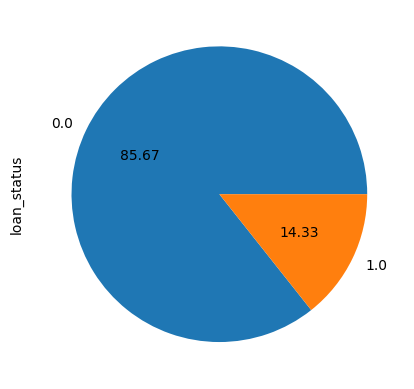

In [54]:
df.loan_status.value_counts().plot.pie(autopct='%.2f')
plt.show()

#### Observations:
1. As we can see loan status maximum loans are Fully Paid which has 85.67% comapred to Charged off has 14.33%

In [55]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year'],
      dtype='object')

In [56]:
df.loan_amnt.describe()

count    37945.000000
mean     11316.141784
std       7478.772560
min        500.000000
25%       5550.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [57]:
#to divide the loan_amnt into bins of 5000
pd.cut(df.loan_amnt,[0,5000,10000,15000,20000,25000,30000,35000,999999], labels=['<5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k','35k+'])
#cut() function is used to separate the array elements into different bins

0            <5k
1            <5k
2            <5k
3         5k-10k
4            <5k
          ...   
39562        <5k
39573     5k-10k
39623     5k-10k
39666    15k-20k
39680        <5k
Name: loan_amnt, Length: 37945, dtype: category
Categories (8, object): ['<5k' < '5k-10k' < '10k-15k' < '15k-20k' < '20k-25k' < '25k-30k' < '30k-35k' < '35k+']

In [58]:
df.loan_amnt_grp= pd.cut(df.loan_amnt,[0,5000,10000,15000,20000,25000,30000,35000,999999], labels=['<5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k','35k+'])

In [59]:
#percentage value in each loan amount group
df.loan_amnt_grp.value_counts(normalize=True)

5k-10k     0.325392
<5k        0.235762
10k-15k    0.203690
15k-20k    0.116853
20k-25k    0.076532
30k-35k    0.021426
25k-30k    0.020345
35k+       0.000000
Name: loan_amnt, dtype: float64

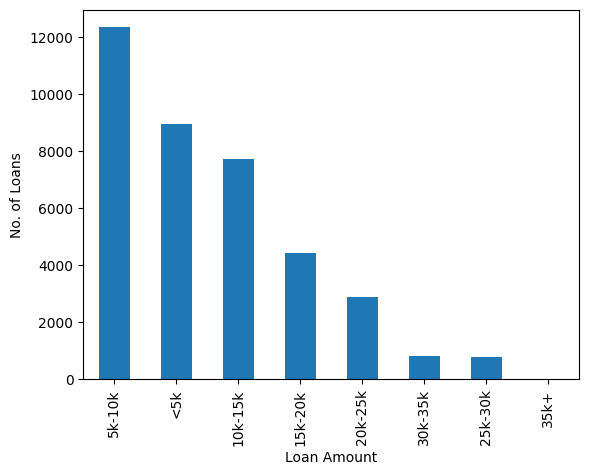

In [60]:
#Plotting the bar plot for loan amount group values
df.loan_amnt_grp.value_counts().plot.bar()
plt.xlabel('Loan Amount')
plt.ylabel('No. of Loans')
plt.show()

#### Observations:
1. Maximum No. of Loans are taken in the range 5k-10k loan amount
2. 75% No. of loans compared to all are in the range <5k loan amount

In [61]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year'],
      dtype='object')

In [62]:
#to analyze the 'term' column
df.term.value_counts(normalize=True)

36    0.727105
60    0.272895
Name: term, dtype: float64

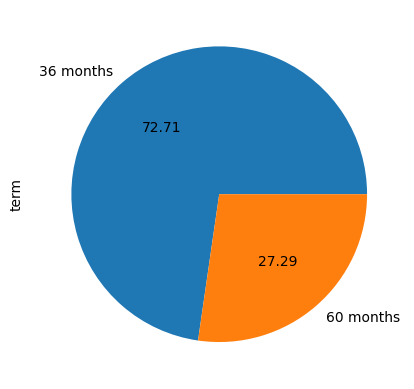

In [63]:
#plotting pie plot for the term 
df.term.value_counts().plot.pie(labels=['36 months', '60 months'],autopct= '%.2f')
plt.show()

#### Observations:
1. we can observe here by pie plot of 'term' that 72.1% loan amount term is 36 months comapred to 60 months which has 27.29%

In [64]:
df.int_rate.describe()

count    37945.000000
mean        12.078367
std          3.735070
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.590000
Name: int_rate, dtype: float64

In [65]:
#to divide the int_rate into bins of 3
df.int_rate_grp= pd.cut(df.int_rate,[5,8,11,14,17,20,23,26],  labels=['5%-8%', '8%-11%', '11%-14%', '14%-17%', '20%-23%', '23%-26%', '26%+'])

In [66]:
#percentage value in each int_rate group
df.int_rate_grp.value_counts(normalize=True)

11%-14%    0.302464
5%-8%      0.205429
8%-11%     0.202398
14%-17%    0.188246
20%-23%    0.078798
23%-26%    0.021426
26%+       0.001239
Name: int_rate, dtype: float64

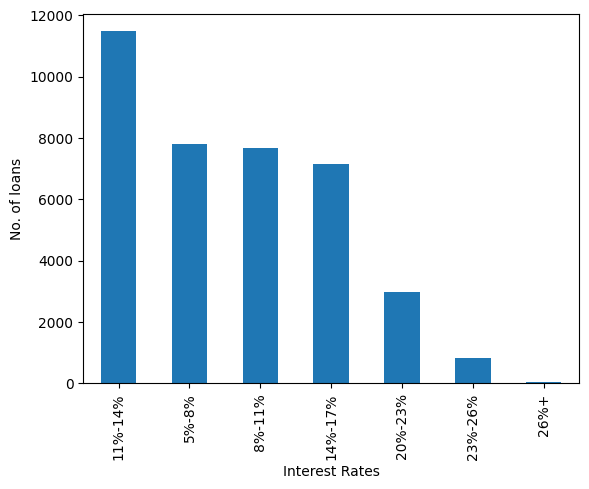

In [67]:
#Plotting the bar plot for Interest rate group values
df.int_rate_grp.value_counts().plot.bar()
plt.xlabel('Interest Rates')
plt.ylabel("No. of loans")
plt.show()

#### Observations:
1. we can see by bar plot maximum No. of loans haves Interest rates 11%-14%

In [68]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year'],
      dtype='object')

In [69]:
df.installment.describe()

count    37945.000000
mean       326.842390
std        209.133271
min         16.080000
25%        168.590000
50%        282.630000
75%        434.400000
max       1305.190000
Name: installment, dtype: float64

In [70]:
##to divide the installment_grp into bins of 200
df.installment_grp= pd.cut(df.installment,[0,200,400,600,800,1000,1200,1400,99999], labels=["0-200","200-400","400-600","600-800","800-1000","1000-1200","1200-1400","1400+"])

In [71]:
#value in each installment_grp
df.installment_grp.value_counts()

200-400      14568
0-200        12484
400-600       6656
600-800       2671
800-1000      1335
1000-1200      173
1200-1400       58
1400+            0
Name: installment, dtype: int64

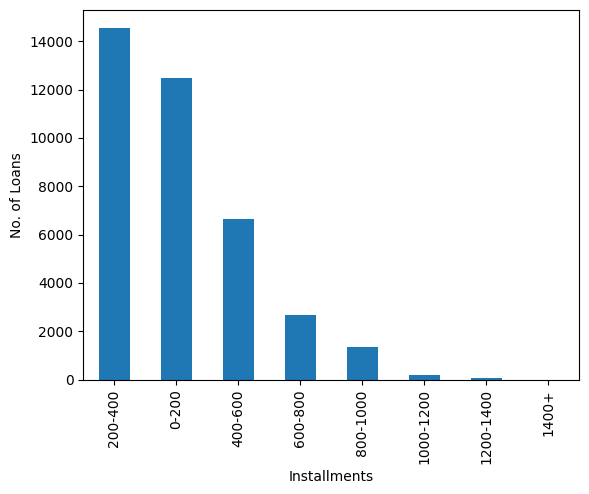

In [72]:
df.installment_grp.value_counts().plot.bar()
plt.xlabel('Installments')
plt.ylabel('No. of Loans')
plt.show()

#### Observations:
1. we can see by bar plot that maximum no. of loans have installments between 200-400


In [73]:
#Analysis on home_ownership column
df.home_ownership.value_counts(normalize=True)

RENT        0.477217
MORTGAGE    0.446963
OWN         0.073238
OTHER       0.002583
Name: home_ownership, dtype: float64

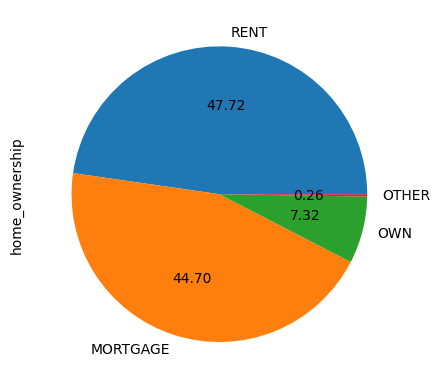

In [74]:
df.home_ownership.value_counts(normalize=True).plot.pie(autopct= '%.2f')
plt.show()

#### Observations:
1. we can see pie plot of home ownership 2 of them hold major majority in plot
2. first one is who has taken home ownership as Rent which hold 47.72%
3. second one is who has taken home ownership as Mortage which hold 44.70%

In [75]:
#Analysis on anuual_inc column
df.annual_inc.describe()

count    3.794500e+04
mean     6.960945e+04
std      6.361049e+04
min      4.000000e+03
25%      4.160400e+04
50%      6.000000e+04
75%      8.323600e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [76]:
#finding number of annual_inc entries above 10 lacs
df[df.annual_inc>1000000].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year
count,13.000000,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000,13.0,13.0,13.0,13.0,13.0,13.0,13.000000
mean,587710.461538,7.469402e+05,10723.076923,9992.307692,9563.343412,45.230769,10.030769,271.820769,6.615385,1.899231e+06,0.076923,2.934615,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
std,133830.436502,1.649293e+05,7393.884449,6245.534944,5938.375835,12.152872,3.283549,151.389487,3.708964,1.440603e+06,0.277350,6.157840,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
min,453667.000000,5.610490e+05,1500.000000,1500.000000,1500.000000,36.000000,6.170000,45.750000,1.000000,1.080000e+06,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.000000
25%,513542.000000,6.635750e+05,5600.000000,5600.000000,5600.000000,36.000000,7.510000,167.840000,3.000000,1.200000e+06,0.000000,0.410000,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
50%,551367.000000,7.105530e+05,10000.000000,10000.000000,9500.000000,36.000000,7.880000,306.680000,8.000000,1.250000e+06,0.000000,0.620000,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
75%,611872.000000,7.845850e+05,12025.000000,12025.000000,12000.000000,60.000000,12.990000,358.850000,10.000000,1.782000e+06,0.000000,1.310000,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
max,884755.000000,1.100269e+06,25000.000000,25000.000000,24493.463530,60.000000,15.200000,597.380000,10.000000,6.000000e+06,1.000000,21.810000,0.0,0.0,0.0,0.0,0.0,0.0,11.000000


#### Observations:
There are only 13 records which have annual income above 10 lacs